#Text Mining Assignement
For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

Data Set : Elon_musk


In [154]:
#import library

In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import string

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
from matplotlib.pyplot import imread

import warnings
warnings.filterwarnings('ignore')

In [157]:
#Import Data:-

In [166]:
tweets = pd.read_csv("Elon_musk.csv",encoding = 'mac_roman',error_bad_lines = False)
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Iím an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [167]:
top_tweets = tweets.head(100)
top_tweets

,Unnamed: 0,Text
0,1,@kunalb11 Iím an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
95,96,Doge
96,97,https://t.co/vviUzWhodT
97,98,@Erdayastronaut High seas &amp; wind
98,99,This was a tough one https://t.co/beY7peFpCj


In [170]:
#Text Preprocessing:-

 Remove empty strings and both leading & trailing characters :

In [169]:
top_tweets = [Text.strip() for Text in top_tweets.Text] 
top_tweets = [Text for Text in top_tweets if Text] 

top_tweets[0:10]

['@kunalb11 Iím an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [171]:
#Joining list into one String / Text :

In [174]:
tweets_join = ''.join(top_tweets)
tweets_join

'@kunalb11 Iím an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine Itís getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [176]:
#Remove twitter usernames handles from text (@usernames) :

In [177]:
from nltk.tokenize import TweetTokenizer

In [179]:
tokenizer = TweetTokenizer(strip_handles = True)

tweets_tokenizer = tokenizer.tokenize(tweets_join)
print(tweets_tokenizer)

['Iím', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'Itís', 'getting', 'realBought', 'some', 'Dogeco

In [178]:
tokenizer = TweetTokenizer(strip_handles = True)

tweets_tokenizer = tokenizer.tokenize(tweets_join)
print(tweets_tokenizer)

['Iím', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'Itís', 'getting', 'realBought', 'some', 'Dogeco

In [15]:
#Again joining a list into one String / Text :

In [16]:
tweets_tokenizer_join = ' '.join(tweets_tokenizer)
tweets_tokenizer_join

'Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley Itís getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto wallet that

In [17]:
#Removing Punctuations :

In [18]:
import string

In [19]:
tweets_punc_remove = tweets_tokenizer_join.translate(str.maketrans('','',string.punctuation))
tweets_punc_remove

'Iím an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley Itís getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that wonít give you your private keys should be avoided at all

In [20]:
# Removing 'https' / 'url' within text :

In [21]:
import re

In [22]:
tweets_url_remove = re.sub(r'http\S+', '', tweets_punc_remove)
tweets_url_remove

'Iím an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley Itís getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that wonít give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Heavy to launch th

In [180]:
# Splitting a sentence into a Words / Tokens :-

In [181]:
from nltk.tokenize import word_tokenize

In [182]:
tweet_words = word_tokenize(tweets_url_remove , language = 'english', preserve_line = True)
print(tweet_words)

['Iím', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'Itís', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 

In [183]:
# Tokenization :

In [184]:
import nltk

In [185]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [186]:
# Tokens count
len(tweet_words)

697

In [188]:
# Removing Stop Words :

In [189]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [190]:
tweet_stopwords = stopwords.words('english')

SW_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','Ö','orÖ']
tweet_stopwords.extend(SW_list)

tweet_no_stopwords = [words for words in tweet_words if words not in tweet_stopwords]
print(tweet_no_stopwords)

['Iím', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'Itís', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'suck

In [191]:
#Normalizing the data :

In [192]:
tweet_lower_words = [Text.lower() for Text in tweet_no_stopwords]
print(tweet_lower_words[100:200])

['first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'blkmdl3', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'donö', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'gö', 'itís', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'thatís', 'youíre', 'missingback', 'work', 'go', 'does', 'seem', 'bit', 'high', 'itsallrisky', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit']


In [193]:
# Stemming the data :

In [194]:
from nltk.stem import PorterStemmer

In [195]:
ps = PorterStemmer()

tweet_stemmed = [ps.stem(word) for word in tweet_lower_words]
print(tweet_stemmed[100:200])

['first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'blkmdl3', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'donö', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'gö', 'ití', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'thatí', 'youír', 'missingback', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'itsallriski', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit']


In [196]:
#Lemmatization :

In [197]:
import spacy

In [198]:
import spacy
!python -m spacy download en_core_web_sm 
from spacy import displacy
    
nlp = spacy.load("en_core_web_sm")

2022-10-28 19:26:51.596713: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 520 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [199]:
nlp = spacy.load('en_core_web_sm')
df = nlp(' '.join(tweet_lower_words))
print(df)

iím alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley itís getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet wonít give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however donö spacex needs pass deep chasm negative cash 

In [200]:
lemmas = [token.lemma_ for token in df]
print(lemmas)

['iím', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'itís', 'getting', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'wonít', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'sele

In [201]:
clean_tweets = ' '.join(lemmas)
clean_tweets

'iím alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley itís getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power any crypto wallet wonít give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however donö spacex need pass deep chasm negative cash flow next year low cos

In [202]:
# Feature Extaction

In [45]:
# Using CountVectorizer :

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

In [204]:
cv = CountVectorizer()

tweets_cv = cv.fit_transform(lemmas)

In [48]:
print(cv.vocabulary_)

{'iím': 145, 'alien': 7, 'idaacarmack': 126, 'ray': 235, 'trace': 308, 'cyberpunk': 46, 'hdr': 116, 'nextlevel': 200, 'have': 114, 'try': 310, 'great': 106, 'interview': 136, 'gtera27': 108, 'doge': 60, 'underestimate': 319, 'teslacn': 289, 'congratulations': 38, 'tesla': 288, 'china': 30, 'amazing': 10, 'execution': 80, 'last': 156, 'year': 341, 'now': 203, 'next': 199, 'even': 78, 'happy': 113, 'new': 198, 'ox': 215, 'underdoge': 318, 'all': 8, 'think': 297, 'would': 337, 'fail': 83, 'himself': 121, 'haha': 110, 'thank': 291, 'indeed': 131, 'tweet': 312, 'definitely': 53, 'represent': 245, 'realworld': 239, 'time': 301, 'allocationthe': 9, 'entertaining': 75, 'outcome': 212, 'likely': 163, 'givedirectly': 103, 'just': 150, 'send': 256, 'somejust': 266, 'agree': 6, 'clubhouse': 32, 'tco3rwe9uhstsgeoffkeighley': 283, 'itís': 144, 'getting': 100, 'realbought': 238, 'dogecoin': 62, 'lil': 165, 'toddler': 302, 'hodler': 123, 'joshmanmode': 148, 'he': 117, 'issue': 140, 'sentencing': 257, 

In [49]:
print(cv.get_feature_names()[100:200])

['getting', 'gigachad', 'give', 'givedirectly', 'go', 'good', 'great', 'greateö', 'gtera27', 'gö', 'haha', 'hang', 'happensandstorm', 'happy', 'have', 'havenít', 'hdr', 'he', 'hear', 'heavy', 'high', 'himself', 'hodl', 'hodler', 'hot', 'however', 'idaacarmack', 'idea', 'image', 'immediately', 'improve', 'indeed', 'inflationary', 'instructional', 'intend', 'intense', 'interview', 'intuitively', 'ipo', 'isp', 'issue', 'it', 'its', 'itsallrisky', 'itís', 'iím', 'jbuttermost', 'joshbickett', 'joshmanmode', 'joshroomsburg', 'just', 'key', 'kingdom', 'kristennetten', 'landi', 'landing', 'last', 'launch', 'laö', 'learnedof', 'least', 'let', 'lever', 'likely', 'likelydoge', 'lil', 'lokino', 'look', 'low', 'lunar', 'madoverlord', 'make', 'manage', 'maneuvering', 'mars', 'marstime', 'mass', 'masterpiece', 'may', 'mean', 'meaningfully', 'meme', 'method', 'michaelhodapp', 'might', 'million', 'min', 'misleading', 'missingback', 'mission', 'must', 'muö', 'my', 'name', 'nasa', 'need', 'negative', 'ne

In [205]:
print(tweets_cv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [206]:
print(tweets_cv.toarray().shape)

(461, 348)


In [52]:
# Using CountVectorizer with N-grams (Bigrams & Trigrams) :

In [53]:
cv_ngrams = CountVectorizer(analyzer = 'word',ngram_range = (1,3),max_features = 100)

cv_ngrams_matrix = cv_ngrams.fit_transform(lemmas)

In [54]:
print(cv_ngrams.get_feature_names())

['60', 'bit', 'booster', 'carbon', 'cash', 'cost', 'crypto', 'definitely', 'doge', 'earth', 'engine', 'entertaining', 'erdayastronaut', 'falcon', 'fix', 'flow', 'freewalletorg', 'great', 'have', 'high', 'itís', 'just', 'last', 'launch', 'low', 'missingback', 'mission', 'must', 'muö', 'my', 'name', 'nasa', 'need', 'negative', 'net', 'new', 'next', 'nextlevel', 'now', 'old', 'once', 'one', 'only', 'option', 'orbit', 'orbital', 'outcome', 'owenspark', 'owndogecoin', 'ox', 'pad', 'pain', 'pass', 'people', 'peopleís', 'per', 'please', 'point', 'pull', 'raptor', 'rationaletienne', 'ray', 'rcs', 'read', 'realbought', 'realworld', 'reasonably', 'receive', 'redlineshifter', 'reflect', 'renatakonkoly', 'represent', 'restaurant', 'risk', 'satellite', 'say', 'scalable', 'seem', 'ship', 'shut', 'so', 'spacex', 'starlink', 'stock', 'tesla', 'thank', 'thatís', 'the', 'this', 'time', 'true', 'try', 'two', 'u0001f3b6', 'we', 'work', 'would', 'wow', 'yeah', 'year']


In [55]:
print(cv_ngrams_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
print(cv_ngrams_matrix.toarray().shape)

(461, 100)


In [ ]:
#Using TF-IDF Vectorizer :-

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [211]:
tf_idf_vec = TfidfVectorizer(norm = 'l2',analyzer = 'word',ngram_range = (1,3),max_features = 500)

tf_idf_vec_matrix = tf_idf_vec.fit_transform(lemmas)

In [210]:
print(tf_idf_vec.get_feature_names())

['100', '300', '39a', '60', 'account', 'actually', 'agree', 'alien', 'all', 'allocationthe', 'amazing', 'any', 'app', 'appear', 'apply', 'arm', 'astrogdogg', 'astrojordy', 'avoid', 'back', 'become', 'bit', 'blkmdl3', 'booster', 'burn', 'by', 'capture', 'carbon', 'cash', 'chasm', 'china', 'clear', 'clubhouse', 'coin', 'collect', 'come', 'commandercruz', 'comp', 'congratulations', 'cost', 'country', 'crypto', 'cryptoshrikar', 'cryptour', 'currency', 'cute', 'cyberpunk', 'damian', 'datum', 'decade', 'deck', 'deep', 'default', 'definitely', 'destiny', 'destroyer', 'difference', 'difficult', 'do', 'doesnít', 'doge', 'dogecakeyolt', 'dogecoin', 'dogecoinrich', 'dogeno', 'donö', 'dumbnext', 'earth', 'easy', 'economic', 'element', 'email', 'endeavor', 'engine', 'enough', 'entertaining', 'erdayastronaut', 'essential', 'even', 'everyone', 'execution', 'explore', 'extremely', 'fail', 'falcon', 'finally', 'first', 'fix', 'flameout', 'flow', 'foolish', 'franz', 'freewalletorg', 'fun', 'future', 'ga

In [209]:
print(tf_idf_vec_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [213]:
print(tf_idf_vec_matrix.toarray().shape)

(461, 348)


In [207]:
#Define a Function To plot Word cloud :-

In [208]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from wordcloud import WordCloud, ImageColorGenerator

In [65]:
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [66]:
#Generate Word Cloud :

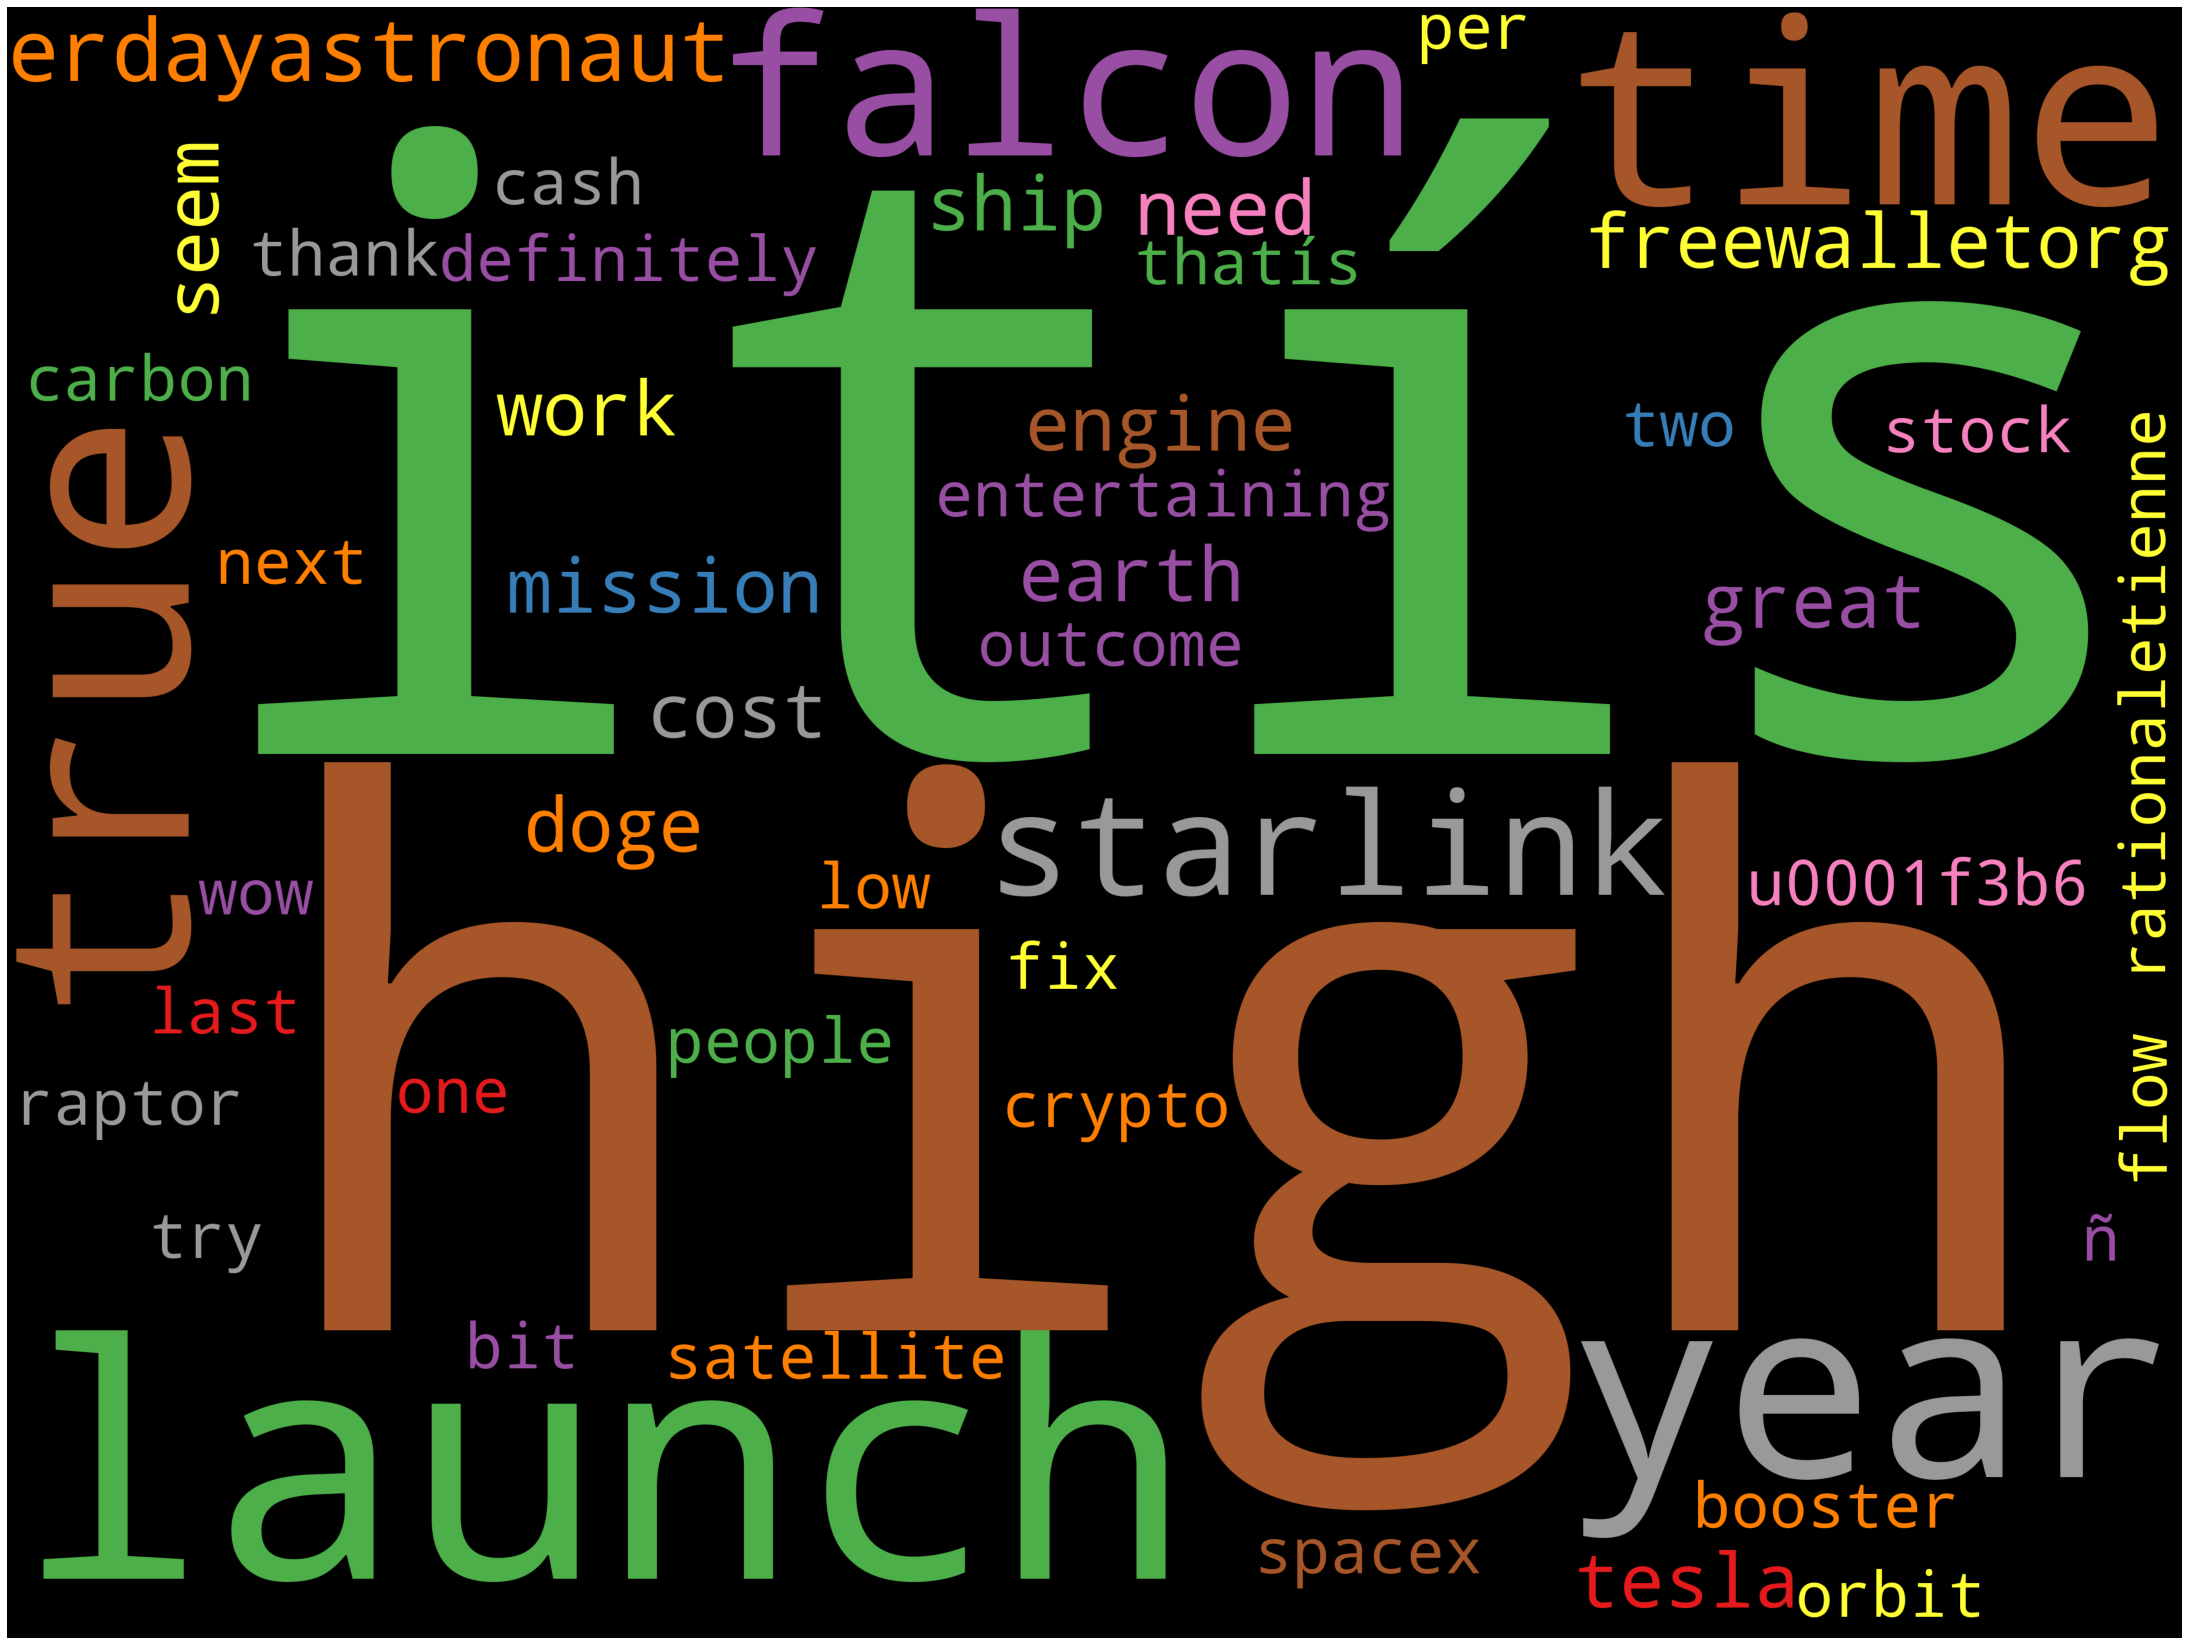

In [67]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

wordcloud = WordCloud(width = 4000,height = 3000,background_color = 'black',max_words = 50,colormap = 'Set1',
                      stopwords = STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [68]:
# Named Entity Recognition (NER) and Parts of Speech (POS) Tagging :

In [69]:
nlp = spacy.load('en_core_web_sm')

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter = True)

In [70]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

first ADV
two NUM
element ADJ
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
blkmdl3 NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo PROPN
rationaletienne PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
donö NOUN
spacex VERB
need AUX
pass VERB
deep ADJ
chasm NOUN
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
gö PROPN
itís ADJ
mean ADJ
price NOUN
country NOUN
only ADV
difference NOUN
taxis ADJ
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
cryptoshrikar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize PROPN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
thatís PROPN
youíre PROPN
missingback NOUN
work NOUN
go VERB
d

In [71]:
# Filtering Nouns and Verbs :

In [72]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'michaelhodapp', 'work', 'tonight', 'ogecoin', 'video', 'people', 'speak', 'image', 'doesnít', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', 'fun', 'joshroomsburg', 'simplicity', 'genius', 'astrogdogg', 'dogecoinrich', 'decade', 'work', 'look', 'note', 'email', 'texts', 'yeslesson', 'learnedof', 'earth', 'marstime', 'tell', 'story', 'tesla', 'spacex', 'theonion', 'read', 'kingdom', 'havenít', 'hear', 'name', 'year', 'kristennetten', 'surethe', 'thing', 'restaurant', 'get', 'currency', 'earth', 'redlineshifter', 'destiny', 'erdayastronaut', 'say', 'ship', 'landing', 'burn', 'solution', 'greateö', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'erdayastronaut', 'seem', 'raptor', 'launch', 'collect', 'galaxy', 'explore', 'unört', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engin

In [73]:
# Counting Noun and Verb tokens :

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Word','Count']
wd_df[0:10]   # viewing top ten results

,Word,Count
0,launch,5
1,year,4
2,time,4
3,starlink,4
4,seem,3
5,freewalletorg,3
6,cost,3
7,falcon,3
8,ship,3
9,earth,3


In [76]:
# Visualizing results (Barchart for top 10 nouns + verbs) :

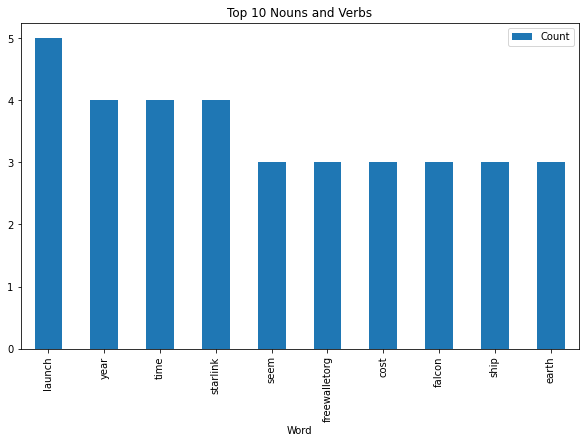

In [77]:
wd_df[0:10].plot.bar(x = 'Word',figsize = (10,6),title = 'Top 10 Nouns and Verbs');

## Emotion Mining - Sentiment Analysis

In [215]:
from nltk import tokenize

In [216]:
sentence = tokenize.sent_tokenize(' '.join(top_tweets))
sentence

['@kunalb11 Iím an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Itís getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [217]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...



* Emotion Lexicon - Affin :

In [218]:
from afinn import Afinn

In [132]:
# Emotion Lexicon - Affin

In [133]:
afinn = pd.read_csv('/content/Afinn.xls',sep = ",",encoding = 'Latin-1')

In [134]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [135]:
affin.shape

(2476, 3)

In [139]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [221]:
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [222]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [223]:
# Calculate the score for the whole original sentence :-

In [224]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text:str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [225]:
# manual testing
calculate_sentiment(text = 'great')

3

In [226]:
#Calculating sentiment value for each sentence :-

In [227]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     0
1     0
2     3
3     3
4     0
5     0
6    -2
7     2
8     0
9     3
10    0
11   -2
12    0
13    0
14    0
15    0
16   -2
17    4
18    0
19    0
20    2
21    0
22    0
23   -3
24    4
25    1
26    1
27    0
28    1
29    3
30    3
31    4
32    2
33    1
34    0
35    3
36    0
Name: sentiment_value, dtype: int64

In [228]:
# Number of words in a sentence :-

In [229]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
5       6
6      14
7      10
8       8
9     109
10     28
11     40
12     17
13      7
14     38
15     13
16      4
17     39
18      7
19      6
20     10
21      4
22      2
23     38
24     15
25     23
26      7
27      8
28     22
29      2
30     39
31     13
32     24
33     89
34      5
35     15
36    132
Name: word_count, dtype: int64

In [230]:
sent_df.sort_values(by = 'sentiment_value')

,sentence,sentiment_value,word_count
23,https://t.co/UEEocOfcTb The people have spoken...,-3,38
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
16,Thatís what youíre missing.,-2,4
11,"However, if we donÖ https://t.co/9Z8Ac6skqx @R...",-2,40
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0,13
34,@josh_bickett @ajtourville @Erdayastronaut @Sp...,0,5
27,"Have to look at old notes, emails, texts.",0,8
22,Instructional video.,0,2
21,– is for –ogecoin!,0,4
19,Enough Raptors for orbit booster\n3.,0,6


##Sentiment score of whole review :-

In [232]:
sent_df['sentiment_value'].describe()

count    37.000000
mean      0.837838
std       1.771903
min      -3.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       4.000000
Name: sentiment_value, dtype: float64

## Negative sentiment score of whole review :

In [234]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8
10,https://t.co/3pWtÖ @ajtourville Yes @BLKMDL3 @...,0,28
11,"However, if we donÖ https://t.co/9Z8Ac6skqx @R...",-2,40
12,Must be scalable to gÖ https://t.co/XMyI7qWSgw...,0,17
13,Only difference should be taxes &amp; shipping.,0,7


##Positive sentiment score of whole review :

In [236]:
sent_df[sent_df['sentiment_value'] > 0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go Ö @CapybaraSurfer @MattWalla...,4,39
20,Improve ship &amp; booster mass @michaelhodapp...,2,10
24,So Ö itís finally come to this Ö https://t.co/...,4,15
25,@JoshRoomsburg @SnoopDogg @genesimmons Its sim...,1,23
26,This is two decades of intense work.,1,7
28,@AstroJordy Yes Lessons learned Of Earth and M...,1,22


In [237]:
 #Adding index cloumn :

In [238]:
sent_df['index'] = range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Iím an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
5,Happy New Year of the Ox!,0,6,5
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14,6
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10,7
8,Tweets definitely do not represent real-world ...,0,8,8
9,The most entertaining outcome is the most like...,3,109,9


##Plotting the sentiment value for whole review :

In [240]:
import seaborn as sns

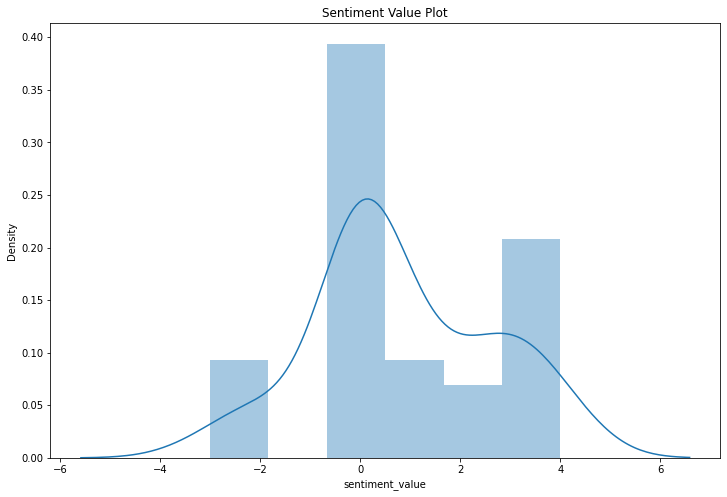

In [241]:
plt.figure(figsize = (12,8))
sns.distplot(sent_df['sentiment_value'])
plt.title('Sentiment Value Plot')
plt.show()


##Plotting the line plot for sentiment value of whole review :

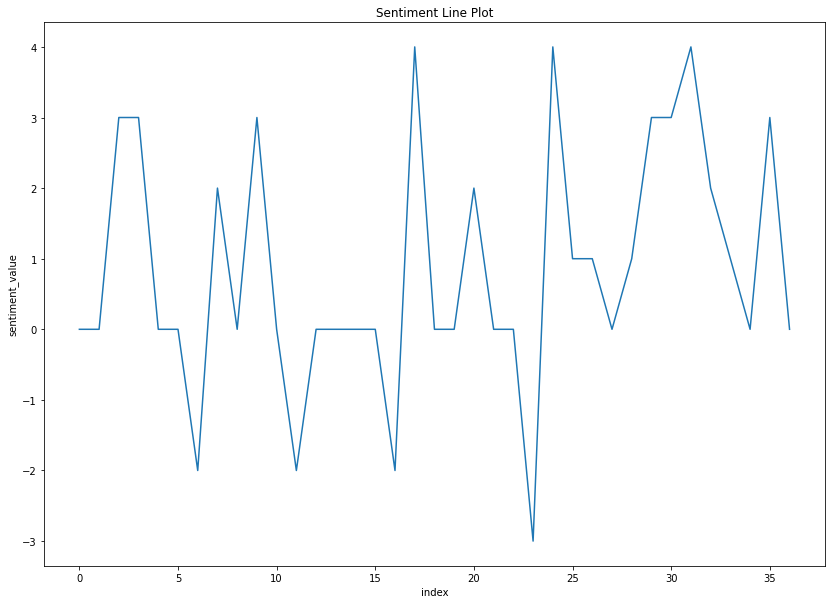

In [243]:
plt.figure(figsize = (14,10))
sns.lineplot(y ='sentiment_value',x = 'index',data = sent_df)
plt.title('Sentiment Line Plot')
plt.show()

In [244]:
# Correlation analysis:

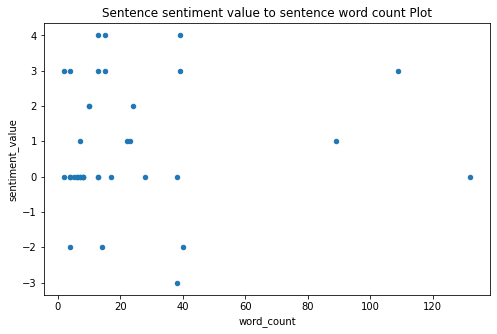

In [245]:
sent_df.plot.scatter(x = 'word_count',y = 'sentiment_value',
                     figsize = (8,5),title = 'Sentence sentiment value to sentence word count Plot')
plt.show()

Result :
According to sentiment values, from the above graphs, we got the positive tweets more as compare to the
negative tweets.